#### Kontrol Automatikoa.Maiatzeko deialdia (2024)

##### 2. problema
Kontrol sistema batean, kontrol diskretua ezartzen da, planta eta berrelikadura izanik $G(s)=\displaystyle\frac{(s^{2}+15.18\,s+121)}{s\,(s+1)\,(s^{2}+14.4\,s+64)}$ eta $H(s)=1$ Maiztasun eremuko teknikak erabiliz kontrolagailu bat diseinatu, hurrengo helburuak betetzeko :

• Egonkorreko errorea arrapala sarreraren aurrean $e_{ss}\leq\%20$

• Gaindiketa maila sarreraren aurrean $\leq\%10$.

Hau da eskatzen dena:

    (a) Aukeratu laginketa periodo egoki bat, azalduz arrazoiak. Diseinatu kontrolagailua eta aztertu portaera begizta itxian, maila sarreraren aurrean (bai irteera, bai kontrol seinalea) 

    (b) Diseinua egin eta gero, baloratu hasieran aukeratutako laginketa periodoa. Era berean, azaldu erabilitako sare mota eta azaldu ea beste sare mota ezberdin bat erabili ahal den.

#### Ebazpena

Lehengo sartu datuak

In [33]:
s=%s;z=%z
g=(s^2+15.18*s+121)/s/(s+1)/(s^2+14.4*s+64);g.dt='c'

ess = 0.2
Kv=1/ess
R=10/100
d=1/sqrt((%pi/log(R))^2+1)

 z = [polynomial] of z
  z
 g = [rational] of s
        121 +15.18s +s^2       
   --------------------------  
   64s +78.4s^2 +15.4s^3 +s^4  
 ess = 
   0.2
 Kv = 
   5.
 R = 
   0.1
 d = 
   0.5911550


Lehengo pasu bezala, irabazia konpentsatu behar da eta Bode diagrama egingo da, horrela lagintze abiadura aukeratzeko : $\omega_{IK}\times 20$ 

 K = 
   2.6446281
 fik = 
   6.764
 Ts = 
   0.1478415


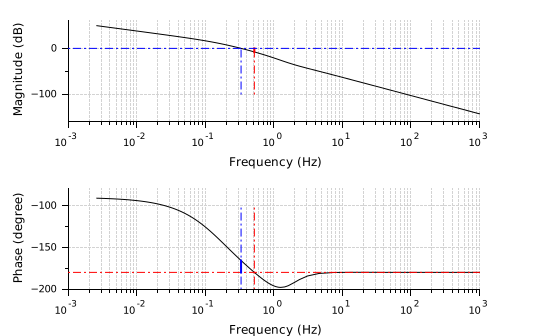

In [35]:
%plot inline
K=Kv/horner(s*g,0)

scf(1);
show_margins(K*g)
fik=0.3382 *20
Ts=1/fik

Aukeratuta $T_s$ (lehengo erreferentzia bezala, agian aldatu behar da), lortzen dugu baliokide diskretua eta egiten dugu Bode berriro, ikusteko zein den dugun fase margina, jakinda, nahi dugula:

$FM=100\delta \sim 59$

 gz = [rational] of z
     0.0012875 -0.0019019z +0.0091641z^2 +0.0113794z^3    
   -----------------------------------------------------  
   0.1026162 -0.7392688z +2.0993895z^2 -2.462737z^3 +z^4  

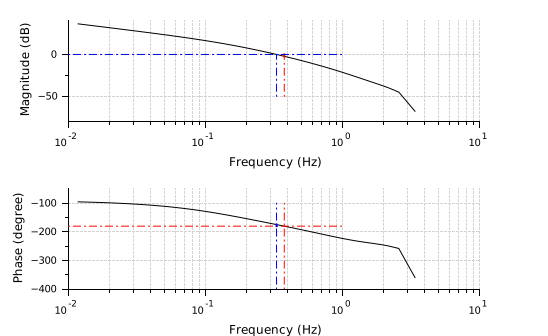

In [38]:
%plot inline
gz=ss2tf(dscr(g,Ts))

scf(1);clf()
show_margins(K*gz)

Irabazi kritikoko maiztasuna da $\omega_{ik} = 0.33\, 2\pi$. Eta fase margina $FM= 180-174=6º$, bahiko txikia da.

Beraz, igo behar dugu, 55º gutxienez. Irabili daiteke atzerapen sarea edo aurrerapena, baina fasea ikusita, errazagoa da atzerapen sarea. 

Ikusten den bezala, irabazi kritikoko maiztasun berri bezala aukeratuz da $\omega_{ik} = 0.074\, 2\pi$, lortzen da nahi den FM Horretarako jaitsi behar dira $$\sim 20$ db. Beraz, kalkulatu ahal dugu sarea. Gero, berstio diskretua lortu behar da Tustin erabiliz.

In [39]:
a= 10^(-20/20)
wik=0.074*2*%pi
Ta=1/a/(wik/10)
sarea = (1+a*Ta*s)/(1+Ta*s)

sareaz=horner(sarea, 2/Ts*(z-1)/(z+1))

 a = 
   0.1
 wik = 
   0.4649557
 Ta = 
   215.07425
 sarea = [rational] of s
   1 +21.507425s  
   -------------  
   1 +215.07425s  
 sareaz = [rational] of z
   -0.0996221 +0.1003092z  
   ----------------------  
       -0.9993128 +z       


Orain konprobatu dezakegu diseinua

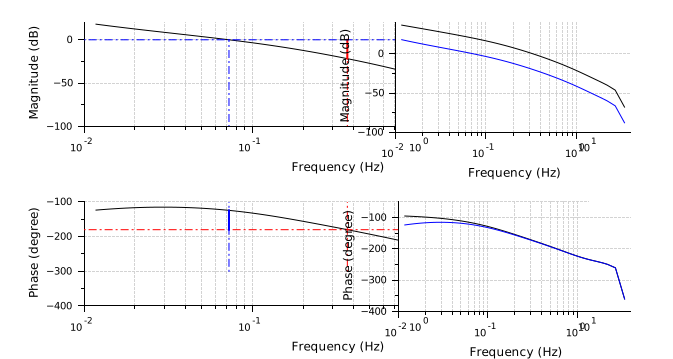

In [42]:
%plot inline
subplot(1,2,1)
show_margins(K*sareaz*gz)
subplot(1,2,2)
bode([K*gz;K*sareaz*gz])


Ikusten da diseinua nahiko ondo joan dela, nahiz eta FM pixka galdu den, (4-5º).

Orain denbora eremuan aztertu dezakegu emaitza

Kalkulatu daiteke gaindiketa $R= \% (0.746-0.709)/0.709 *100=\%5.2 $ eta puntako denbora $T_1= 0.29$. Beraz espezifikaziak ia ia lortzen dira. baina sistema pixka bat oszilakorragoa da, betiko arrazioagatik, zeroren eragina, $-7.7$ puntuan eta gutxigatik bada ere, elementu garrantzitsua da, erlatiboki, hurbil dagolako jatorritik.

b) atalari dagokionez, baita ere ikusten da errorea ez dela zero, sistema 0 motakoa delako. Arrapala sarreraren aurrean, horregatik, errorea infinitua izango zen. Ez du pena merezi kalkulatzea, badakigu 0 motakoa delako.

Orain d) atala.

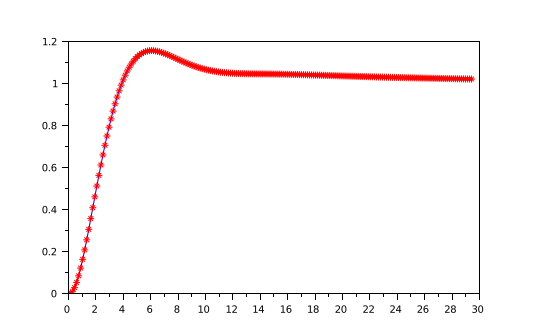

In [20]:
tz=(0:199)*Ts;
rz=ones(1,200);
gitxiaz=(K*(sareaz*gz)/.(1));

yz=dsimul(tf2ss(gitxiaz),rz);
plot(tz,yz, tz,yz, '*r')

Ikusten den bezala, gaindiketa pixka bat altuxeagoa da. Laginketa periodoa nahikoa da, jaitsi zitekeen ere.

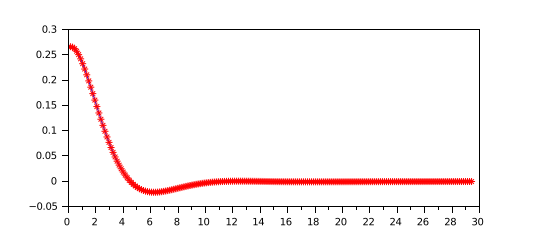

In [23]:
uitxiaz=((K*sareaz)/.(gz));

uz=dsimul(tf2ss(uitxiaz),rz);
scf(1);
plot(tz,uz, tz, uz, "*r")

Kontrol seinalea pixka bat txikia da. Erroen kokaeran ikusita, K handituz, ez dago argi sistema moteltzen den. Beraz berdiseinatu daiteke, indartuz FMa Adibidez

 a = 
   0.0794328
 wik = 
   0.3832743
 Ta = 
   328.46591
 sarea = [rational] of s
   1 +26.090974s  
   -------------  
   1 +328.46591s  
 sareaz = [rational] of z
   -0.07919 +0.0796399z  
   --------------------  
       -0.99955 +z       


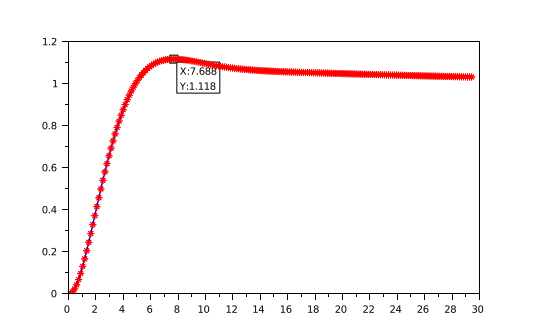

In [32]:
%plot inline

a= 10^(-22/20)
wik=0.061*2*%pi
Ta=1/a/(wik/10)
sarea = (1+a*Ta*s)/(1+Ta*s)

sareaz=horner(sarea, 2/Ts*(z-1)/(z+1))

gitxiaz=(K*(sareaz*gz)/.(1));

yz=dsimul(tf2ss(gitxiaz),rz);
plot(tz,yz, tz,yz, '*r')

Lortu dugu FMa hobetzea, eta orain $R= \%12$ nahi dugunaren hurbil